# Analisis de datos de pacientes con precion arterial

En este nuevo conjunto de datos deberán desarrollar la tarea de $ Análisis Exploratorio $ siguiendo los tips con que hemos estado trabajando, procurando sobre todo entender la naturaleza de los datos, los rangos y distribución de valores de cada variable, y eventualmente la interrelación que hubiere entre ellas.
Se trata de información sobre 5000 personas relativa a 5 variables: 
* Altura. 
* Peso
* Edad
* Sexo
* Presión Arterial Máxima.

El trabajo es, como lo anticipamos, esencialmente una tarea de EDA (Análisis Exploratorio de Datos), prestando especial atención a los siguientes puntos:
* Observar el DataSet con todas las herramientas posibles, familiarizarse con su contenido, con la naturaleza y rango de valores "válidos" para cada variable. Observar mínimos, máximos, mediana y desvío o varianza.
* En función de lo anterior, determinar errores, omisiones, y outliers. Corregir el Dataset eliminando del mismo los registros inconsistentes: este es un lujo que podemos darnos ya que se trata de muchas mediciones!
* Procurar establecer gráficas descriptivas que presenten la info contenida en el Dataset desde diferentes puntos de vista: la idea es comunicar todos los detalles posibles sobre esta población de manera sintética y gráfica.
* Llegamos así a lo más importante de todo: Tenemos como OBJETIVO establecer el grado de correlación entre las variables; y más específicamente, en qué medida depende la PA del resto de las variables. Esto puede ser de manera directa o modificada. Quizá alguno encuentra que la PA no depende fuertemente de ninguna de las variables, pero sí de una combinación de ellas. Sugerencia: tener en cuenta algunas medidas antropométricas que pueden derivarse de los datos provistos, como por ejemplo, el IMC (índice de masa corporal).
* También se puede, considerando lo anterior, establecer una suerte de regresión lineal para las variables que guarden cierto grado de interdependencia: sería interesante presentar los resultados obtenidos.
* Tener en cuenta que el experimento debe ser "repetible", y por tanto, debe quedar registro documental de cada tarea realizada.
* En lo posible, parametrizar cada acción de modo tal que uno pueda ensayar el impacto ante diferentes modificaciones en dichos parámetros (en cada nueva corrida del experimento, obviamente). Por caso, un ejemplo de esto podría ser establecer cuántos desvíos consideraré como válidos a cada lado de la mediana, o de la media, de la distribución de valores de cada variable... Obviamente no es el único posible: quedará en el análisis que cada uno realice considerar qué más puede parametrizarse.


### Carga del Archivo

Como primera instancia lo que hacemos es cargar el archivo csv de los datos, generamos un dataframe y lo visualizamos.

In [122]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import plotly.express as px 
from plotly.offline import plot 

Usaremos en este caso, para separar los datos del archivo csv el ";" y para los decimal las ","

In [123]:
df = pd.read_csv("data/DataSet Edad-Talla-Peso-TA.csv", sep= ';', decimal = ',')
df

,Altura,Peso,Sexo,Edad,PA_max
0,1.47,53000,M,33,12.3
1,172.00,90,F,28,13.3
2,1.60,118,M,77,24.9
3,1.76,97,M,52,18.3
4,1.81,118,F,73,25.8
...,...,...,...,...,...
4995,1.85,105,M,74,13.6
4996,1.78,66,F,31,9.9
4997,1.81,168,F,57,15.5
4998,2.04,99,M,44,11.8


### Correcion de datos mal cargados.

Vamos a usar la funcion $info()$ y $describe()$ para saber cual es el contenido del archivo

In [124]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Altura  4901 non-null   float64
 1   Peso    5000 non-null   int64  
 2   Sexo    4910 non-null   object 
 3   Edad    5000 non-null   int64  
 4   PA_max  5000 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 195.4+ KB


,Altura,Peso,Edad,PA_max
count,4901.000000,5000.00000,5000.000000,5000.000000
mean,8.013291,1102.30400,47.875000,16.422520
std,32.148415,8753.19627,17.300833,13.776803
min,1.450000,0.00000,18.000000,8.400000
25%,1.600000,64.00000,33.000000,12.500000
50%,1.700000,80.00000,48.000000,14.400000
75%,1.820000,104.00000,63.000000,16.900000
max,226.000000,123000.00000,77.000000,193.000000


Verificamos que hay datos nulos en las columnas $"Altura"$ y $"Sexo"$ y tambien vemos que en la columna $"Peso"$ se presentan varios datos en 0. Luego de verificar esto, procedemos a la eliminacion de estos datos. 

In [125]:
df = df.dropna()
val_peso_0 = df[df['Peso'] == 0].index
df = df.drop(val_peso_0)

Volvemos a usar $info()$ y $describe()$ para ver como termino el DF luego de su edicion

In [126]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4783 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Altura  4783 non-null   float64
 1   Peso    4783 non-null   int64  
 2   Sexo    4783 non-null   object 
 3   Edad    4783 non-null   int64  
 4   PA_max  4783 non-null   float64
dtypes: float64(2), int64(2), object(1)
memory usage: 224.2+ KB


,Altura,Peso,Edad,PA_max
count,4783.000000,4783.000000,4783.000000,4783.000000
mean,7.854963,1071.820824,47.843404,16.320928
std,31.772258,8530.552009,17.317282,13.320890
min,1.450000,36.000000,18.000000,8.400000
25%,1.600000,64.000000,33.000000,12.500000
50%,1.700000,81.000000,48.000000,14.400000
75%,1.820000,104.000000,63.000000,16.900000
max,226.000000,123000.000000,77.000000,193.000000


Verificando lo que describe() nos dice estamos encontrando que hay datos que no concuerdan con la logica de los parametros de una persona, en este caso los que estan mal son de la altura, peso y PA_max.
   
Procedemos a su edición.
* 1ro identificamos.
* 2do modificamos.

#### Trabajamos con la altura. 

Lo que podemos detectar cuando usamos describe() en el data frame, es que hay valores que no estan dentro de las medidas de altura aceptadas para una persona. Entonces lo que vamos a hacer realizar un filtro con la altura mas alta que una perosa podria llegar a tener y de ahi pasarlos a medidas ordinarias

In [127]:
altura= df[['Altura']]
altura_unique, counts = np.unique(altura, return_counts=True)
dic_altura = {altura_unique[i]: counts[i] for i in range(len(altura_unique))}
dic_altura

{1.45: 55,
 1.46: 52,
 1.47: 53,
 1.48: 54,
 1.49: 46,
 1.5: 50,
 1.51: 50,
 1.52: 44,
 1.53: 48,
 1.54: 55,
 1.55: 182,
 1.56: 101,
 1.57: 109,
 1.58: 109,
 1.59: 100,
 1.6: 106,
 1.61: 127,
 1.62: 98,
 1.63: 108,
 1.64: 107,
 1.65: 224,
 1.66: 105,
 1.67: 117,
 1.68: 120,
 1.69: 106,
 1.7: 111,
 1.71: 133,
 1.72: 92,
 1.73: 118,
 1.74: 114,
 1.75: 199,
 1.76: 89,
 1.77: 79,
 1.78: 89,
 1.79: 76,
 1.8: 76,
 1.81: 82,
 1.82: 94,
 1.83: 64,
 1.84: 101,
 1.85: 113,
 1.86: 50,
 1.87: 46,
 1.88: 44,
 1.89: 36,
 1.9: 42,
 1.91: 36,
 1.92: 37,
 1.93: 38,
 1.94: 36,
 1.95: 54,
 1.96: 16,
 1.97: 17,
 1.98: 17,
 1.99: 21,
 2.0: 12,
 2.01: 13,
 2.02: 24,
 2.03: 19,
 2.04: 19,
 2.05: 17,
 2.06: 7,
 2.07: 7,
 2.08: 3,
 2.09: 4,
 2.1: 7,
 2.11: 5,
 2.12: 2,
 2.13: 6,
 2.14: 3,
 2.15: 11,
 2.27: 1,
 2.28: 2,
 2.35: 1,
 145.0: 2,
 146.0: 1,
 148.0: 2,
 149.0: 2,
 151.0: 5,
 152.0: 4,
 155.0: 9,
 157.0: 8,
 158.0: 8,
 160.0: 8,
 161.0: 11,
 163.0: 7,
 164.0: 3,
 166.0: 4,
 167.0: 6,
 169.0: 3,
 170.0:

Mostramos en una grafica los valores que estan fuera del parametro y luego los correguimos.

In [128]:
fig_altura = px.box(df,y = "Altura", points='all') 
fig_altura.show()

In [129]:
df.loc[df["Altura"] > 10,'Altura'] = df["Altura"] / 100
df.Altura.describe()

count    4783.000000
mean        1.705911
std         0.142452
min         1.450000
25%         1.600000
50%         1.690000
75%         1.800000
max         2.350000
Name: Altura, dtype: float64

In [130]:
fig_altura = px.box(df,  y = "Altura", points='all') 
fig_altura.show()

#### Trabajamos con el peso

De igual forma como vimos con la altura, en el peso pasa exactamente lo mismo. Pero con la diferencia que algunos valores fueron expresados en gramos y no en kilos. Vamos a realizar la modificacion de los mismo mostrando en grafica el antes y despues. 

In [131]:
peso = df[['Peso']]
peso

,Peso
0,53000
1,90
2,118
3,97
4,118
...,...
4995,105
4996,66
4997,168
4998,99


In [132]:
peso_unique, counts1 = np.unique(peso, return_counts=True) 
dic_peso = {peso_unique[i]: counts1[i] for i in range(len(peso_unique))}
dic_peso

{36: 3,
 37: 3,
 38: 7,
 39: 10,
 40: 6,
 41: 7,
 42: 23,
 43: 11,
 44: 21,
 45: 23,
 46: 32,
 47: 25,
 48: 33,
 49: 40,
 50: 38,
 51: 54,
 52: 50,
 53: 49,
 54: 54,
 55: 58,
 56: 65,
 57: 68,
 58: 78,
 59: 57,
 60: 83,
 61: 81,
 62: 62,
 63: 92,
 64: 87,
 65: 77,
 66: 63,
 67: 64,
 68: 81,
 69: 95,
 70: 81,
 71: 87,
 72: 69,
 73: 73,
 74: 84,
 75: 77,
 76: 67,
 77: 63,
 78: 59,
 79: 58,
 80: 69,
 81: 65,
 82: 65,
 83: 67,
 84: 78,
 85: 66,
 86: 60,
 87: 60,
 88: 51,
 89: 61,
 90: 45,
 91: 55,
 92: 46,
 93: 38,
 94: 41,
 95: 43,
 96: 41,
 97: 53,
 98: 40,
 99: 44,
 100: 47,
 101: 45,
 102: 41,
 103: 38,
 104: 30,
 105: 35,
 106: 25,
 107: 35,
 108: 28,
 109: 24,
 110: 25,
 111: 29,
 112: 26,
 113: 25,
 114: 10,
 115: 27,
 116: 20,
 117: 27,
 118: 16,
 119: 15,
 120: 23,
 121: 19,
 122: 16,
 123: 18,
 124: 25,
 125: 13,
 126: 20,
 127: 15,
 128: 20,
 129: 19,
 130: 12,
 131: 13,
 132: 15,
 133: 12,
 134: 12,
 135: 10,
 136: 14,
 137: 11,
 138: 17,
 139: 11,
 140: 20,
 141: 13,
 142: 12,

In [133]:
fig_peso = px.box(peso,  y = "Peso", points='all') 
fig_peso.show()

In [134]:
df.loc[df["Peso"] > 500,'Peso'] = df["Peso"] / 1000
df.Peso.describe()

count    4783.000000
mean       88.067949
std        34.297402
min        36.000000
25%        64.000000
50%        80.000000
75%       102.000000
max       289.000000
Name: Peso, dtype: float64

In [135]:
fig_peso = px.box(df,  y = "Peso", points='all') 
fig_peso.show()

#### Trabajamos con la edad.

En el caso de la edad no encontramos ningun valor que no concuerde con el promedio de vidad de una persona. 

In [136]:
Edad = df[['Edad']]
Edad

,Edad
0,33
1,28
2,77
3,52
4,73
...,...
4995,74
4996,31
4997,57
4998,44


In [137]:
fig_edad = px.box(df,  y = "Edad", points='all') 
fig_edad.show()

In [140]:
edad_unique, counts2 = np.unique(Edad, return_counts=True)
dic_edad = {edad_unique[i]: counts2[i] for i in range(len(edad_unique))}
dic_edad

{18: 64,
 19: 86,
 20: 81,
 21: 83,
 22: 58,
 23: 94,
 24: 74,
 25: 88,
 26: 66,
 27: 73,
 28: 85,
 29: 72,
 30: 60,
 31: 74,
 32: 67,
 33: 93,
 34: 70,
 35: 88,
 36: 80,
 37: 84,
 38: 101,
 39: 68,
 40: 77,
 41: 99,
 42: 80,
 43: 83,
 44: 83,
 45: 78,
 46: 87,
 47: 92,
 48: 76,
 49: 87,
 50: 91,
 51: 78,
 52: 81,
 53: 73,
 54: 69,
 55: 77,
 56: 64,
 57: 81,
 58: 83,
 59: 73,
 60: 83,
 61: 68,
 62: 74,
 63: 77,
 64: 82,
 65: 80,
 66: 67,
 67: 86,
 68: 83,
 69: 71,
 70: 83,
 71: 96,
 72: 86,
 73: 75,
 74: 95,
 75: 93,
 76: 78,
 77: 85}

#### Trabajamos con la PA_max

Vemos que dentro de la precion arterial maxima tambien se generan valores atipicos, luego de eso se genera una edicion de esos datos. Tambien se muestran representados con el antes y el despues en una grafica.

In [81]:
pa_max = df[['PA_max']]
pa_max

,PA_max
0,12.3
1,13.3
2,24.9
3,18.3
4,25.8
...,...
4995,13.6
4996,9.9
4997,15.5
4998,11.8


In [29]:
fig_pa_max = px.box(df,  y = "PA_max", points='all') 
fig_pa_max.show()

In [141]:
pa_max_unique, counts3 = np.unique(pa_max, return_counts=True)
dic_pa_max = {pa_max_unique[i]: counts3[i] for i in range(len(pa_max_unique))}
dic_pa_max

{8.4: 1,
 8.5: 1,
 8.6: 2,
 8.7: 1,
 8.75: 1,
 8.8: 3,
 9.0: 8,
 9.1: 8,
 9.2: 8,
 9.3: 10,
 9.39: 1,
 9.4: 11,
 9.5: 18,
 9.6: 8,
 9.7: 8,
 9.8: 14,
 9.9: 19,
 9.940000000000001: 1,
 10.0: 19,
 10.1: 22,
 10.18: 1,
 10.2: 22,
 10.3: 20,
 10.4: 26,
 10.5: 24,
 10.6: 35,
 10.7: 24,
 10.8: 26,
 10.82: 1,
 10.9: 43,
 11.0: 44,
 11.1: 37,
 11.2: 44,
 11.3: 41,
 11.4: 47,
 11.5: 55,
 11.53: 1,
 11.6: 61,
 11.7: 47,
 11.8: 45,
 11.89: 1,
 11.9: 47,
 11.99: 1,
 12.0: 55,
 12.02: 1,
 12.1: 61,
 12.2: 58,
 12.26: 1,
 12.3: 60,
 12.4: 55,
 12.5: 61,
 12.6: 66,
 12.7: 60,
 12.8: 64,
 12.85: 1,
 12.88: 1,
 12.9: 60,
 12.919999999999998: 1,
 12.969999999999999: 1,
 13.0: 65,
 13.1: 74,
 13.2: 70,
 13.219999999999999: 1,
 13.3: 66,
 13.319999999999999: 1,
 13.4: 61,
 13.45: 1,
 13.5: 73,
 13.540000000000001: 1,
 13.6: 77,
 13.65: 1,
 13.66: 1,
 13.7: 65,
 13.8: 66,
 13.87: 1,
 13.88: 1,
 13.9: 42,
 13.919999999999998: 1,
 14.0: 51,
 14.1: 61,
 14.2: 58,
 14.209999999999999: 1,
 14.23: 1,
 14.2900000

In [142]:
df.loc[df["PA_max"] > 55,'PA_max'] = df["PA_max"] / 10
df.PA_max.describe()

count    4783.000000
mean       15.025045
std         3.571325
min         8.400000
25%        12.500000
50%        14.400000
75%        16.800000
max        32.300000
Name: PA_max, dtype: float64

In [143]:
fig_pa_max1 = px.box(df,  y = "PA_max", points='all') 
fig_pa_max1.show()

#### Generamos la columna IMC 

Tal como solicita en la consiga generamos una nueva columna que viene a ser el $ "$ $El$ $indice$ $de$ $masa$ $corporal$ $" $ que vendria a ser el peso de las personas dividido la altura elevado al cuadrado

In [144]:
df['IMC'] = (df.Peso / (df.Altura **2))
df

,Altura,Peso,Sexo,Edad,PA_max,IMC
0,1.47,53.0,M,33,12.3,24.526818
1,1.72,90.0,F,28,13.3,30.421850
2,1.60,118.0,M,77,24.9,46.093750
3,1.76,97.0,M,52,18.3,31.314566
4,1.81,118.0,F,73,25.8,36.018437
...,...,...,...,...,...,...
4995,1.85,105.0,M,74,13.6,30.679328
4996,1.78,66.0,F,31,9.9,20.830703
4997,1.81,168.0,F,57,15.5,51.280486
4998,2.04,99.0,M,44,11.8,23.788927


In [145]:
df.IMC.describe()

count    4783.000000
mean       29.816714
std         9.509131
min        17.122473
25%        23.101922
50%        27.173913
75%        31.841138
max        65.507685
Name: IMC, dtype: float64

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4783 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Altura  4783 non-null   float64
 1   Peso    4783 non-null   float64
 2   Sexo    4783 non-null   object 
 3   Edad    4783 non-null   int64  
 4   PA_max  4783 non-null   float64
 5   IMC     4783 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 390.6+ KB


#### Agrupamiento de datos.

Vamos a empezar realizando una clasificacion para el indice de $IMC$ con el que vamos a generar grupos dependiendo lo que los medicos nos informan sobre esto, los parametros de clasificacion son: 
   * Insuficiente
   * Normal
   * Sobrepeso
   * Obesidad

Los datos fueron sacados desde el siguiente link https://www.cdc.gov/healthyweight/spanish/assessing/index.html

In [147]:
IMC_class = pd.cut(df['IMC'], [0,18.5,25,30,80], labels = ['Insuficiente', 'Normal', 'Sobrepeso', 'Obesidad'] )
df['Clas_segun_IMC'] = IMC_class
df

,Altura,Peso,Sexo,Edad,PA_max,IMC,Clas_segun_IMC
0,1.47,53.0,M,33,12.3,24.526818,Normal
1,1.72,90.0,F,28,13.3,30.421850,Obesidad
2,1.60,118.0,M,77,24.9,46.093750,Obesidad
3,1.76,97.0,M,52,18.3,31.314566,Obesidad
4,1.81,118.0,F,73,25.8,36.018437,Obesidad
...,...,...,...,...,...,...,...
4995,1.85,105.0,M,74,13.6,30.679328,Obesidad
4996,1.78,66.0,F,31,9.9,20.830703,Normal
4997,1.81,168.0,F,57,15.5,51.280486,Obesidad
4998,2.04,99.0,M,44,11.8,23.788927,Normal


In [148]:
IMC_grupo_PA_max = df.groupby(df.Clas_segun_IMC)['PA_max']
IMC_grupo_PA_max.describe()

,count,mean,std,min,25%,50%,75%,max
Clas_segun_IMC,,,,,,,,
Insuficiente,46.0,13.547826,3.054377,10.5,11.6,12.6,14.975,24.3
Normal,1699.0,14.112166,3.239805,8.4,11.9,13.5,15.600,29.5
Sobrepeso,1440.0,15.665854,3.678542,8.7,13.2,15.0,17.300,32.3
Obesidad,1598.0,15.460695,3.614645,9.0,12.9,14.9,17.400,31.3


Luego de hacer las agrupaciones que habiamos mencionado y agregarlas al dataframe, generamos un grafico que muestra la cantidad de personas que hay dentro de cada categoria. 

<AxesSubplot:title={'center':'Clasificacion segun categoria IMC'}, xlabel='Clas_segun_IMC'>

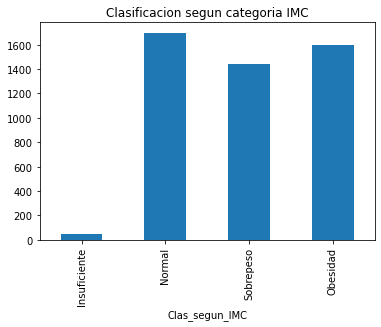

In [149]:
IMC_grupo_PA_max1 = df.groupby(df.Clas_segun_IMC)['PA_max'].size()
IMC_grupo_PA_max1.plot.bar(title = "Clasificacion segun categoria IMC")

Realizamos la misma agrupacion de recien para ahora le agrego de sexo para saber cuantos hombres y mujeres entran dentro de cada categoria. 

In [150]:
IMC_grupo_sexo = df.groupby(df.Sexo)['PA_max']
IMC_grupo_sexo.describe()

,count,mean,std,min,25%,50%,75%,max
Sexo,,,,,,,,
F,2456.0,15.063176,3.572943,8.5,12.5,14.5,16.8,31.5
M,2327.0,14.984800,3.569942,8.4,12.5,14.3,16.7,32.3


<AxesSubplot:title={'center':'Clasificacion segun sexo en IMC'}, xlabel='Sexo,Clas_segun_IMC'>

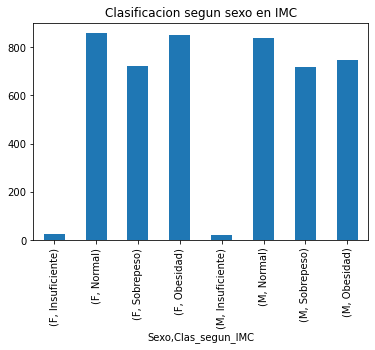

In [151]:
IMC_grupo_sexo1 = df.groupby([df.Sexo, df.Clas_segun_IMC])['PA_max'].size()
IMC_grupo_sexo1.plot.bar(title = "Clasificacion segun sexo en IMC")

In [152]:
IMC_grupo_sexo2 = px.scatter_3d(IMC_grupo_sexo1,df.Clas_segun_IMC,df.Sexo,df.PA_max ,color = IMC_class)
plot(IMC_grupo_sexo2)

'temp-plot.html'

Luego de eso, genero parametros para poder clasificar los datos con respecto a su rango de edad. Para eso los vamos a dividir de la siguiente forma:
* Infancia (0 a 6 años de edad)
* Niñez (6 a 12 años de edad)
* Adolescencia (12 a 20 años de edad)
* Juventud (20 a 25 años de edad)
* Adultez (25 a 60 años de edad)
* Ancianidad (60 años en adelante)

Los datos fueron sacados desde la siguiente web https://www.euroinnova.com.ar/blog/etapas-de-la-vida-por-edad

In [153]:
edad_class = pd.cut(df['Edad'],[0,6,12,20,25,60,120], labels = ['Infancia', 'Niñez', 'Adolescencia', 'Juventud', 'Adultez', 'Ancianidad'])
df['Clas_por_Edad']= edad_class
df

,Altura,Peso,Sexo,Edad,PA_max,IMC,Clas_segun_IMC,Clas_por_Edad
0,1.47,53.0,M,33,12.3,24.526818,Normal,Adultez
1,1.72,90.0,F,28,13.3,30.421850,Obesidad,Adultez
2,1.60,118.0,M,77,24.9,46.093750,Obesidad,Ancianidad
3,1.76,97.0,M,52,18.3,31.314566,Obesidad,Adultez
4,1.81,118.0,F,73,25.8,36.018437,Obesidad,Ancianidad
...,...,...,...,...,...,...,...,...
4995,1.85,105.0,M,74,13.6,30.679328,Obesidad,Ancianidad
4996,1.78,66.0,F,31,9.9,20.830703,Normal,Adultez
4997,1.81,168.0,F,57,15.5,51.280486,Obesidad,Adultez
4998,2.04,99.0,M,44,11.8,23.788927,Normal,Adultez


In [154]:
IMC_grupo_edad = df.groupby(df.Clas_por_Edad)['PA_max']
IMC_grupo_edad.describe()

,count,mean,std,min,25%,50%,75%,max
Clas_por_Edad,,,,,,,,
Infancia,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Niñez,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Adolescencia,231.0,12.699264,2.834146,8.5,10.8,12.1,13.85,22.8
Juventud,397.0,12.806700,2.811953,8.4,10.9,12.3,13.80,22.7
Adultez,2776.0,14.609496,3.197742,9.0,12.4,14.0,16.00,30.1
Ancianidad,1379.0,16.889804,3.728738,10.7,14.3,16.2,18.60,32.3


Mostramos la cantidad de personas con respecto a su rango de edad que hay dentro de cada categoria. 

<AxesSubplot:title={'center':'Clasificacion segun Edad'}, xlabel='Clas_por_Edad'>

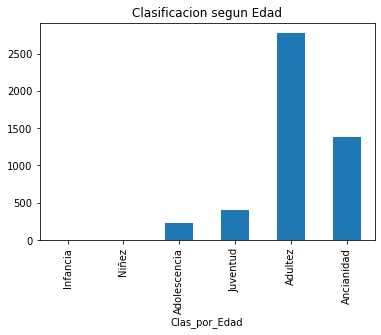

In [155]:
IMC_grupo_edad = df.groupby(df.Clas_por_Edad)['PA_max'].size()
IMC_grupo_edad.plot.bar(title = "Clasificacion segun Edad")

In [156]:
IMC_grupo_edad1 = df.groupby([df.Sexo,df.Clas_por_Edad])['PA_max']
IMC_grupo_edad1.describe()

count       mean       std   min    25%    50%     75%  \
Sexo Clas_por_Edad                                                            
F    Adolescencia    110.0  12.898909  3.142935   8.5  10.65  12.10  14.175   
     Juventud        211.0  12.787299  2.844825   8.6  10.90  12.20  13.900   
     Adultez        1419.0  14.634630  3.189644   9.0  12.40  14.10  16.100   
     Ancianidad      716.0  16.915670  3.704418  10.7  14.40  16.20  18.500   
M    Adolescencia    121.0  12.517769  2.520534   8.8  10.80  12.10  13.600   
     Juventud        186.0  12.828710  2.781694   8.4  10.90  12.45  13.775   
     Adultez        1357.0  14.583213  3.207153   9.0  12.40  14.00  16.000   
     Ancianidad      663.0  16.861870  3.757423  10.7  14.25  16.20  18.600   

                     max  
Sexo Clas_por_Edad        
F    Adolescencia   21.1  
     Juventud       22.7  
     Adultez        30.1  
     Ancianidad     31.5  
M    Adolescencia   22.8  
     Juventud       21.9  
     Adultez        29.3  
     Ancianidad     32.3

<AxesSubplot:title={'center':'Clasificacion segun sexo en IMC'}, xlabel='Sexo,Clas_por_Edad'>

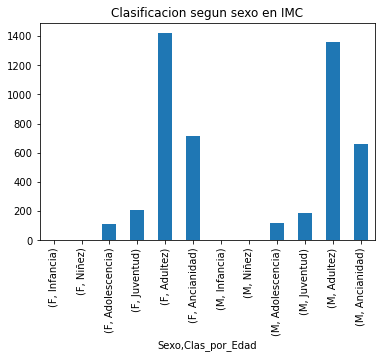

In [157]:
IMC_grupo_edad1 = df.groupby([df.Sexo, df.Clas_por_Edad])['PA_max'].size()
IMC_grupo_edad1.plot.bar(title = "Clasificacion segun sexo en IMC")

In [158]:
IMC_grupo_edad2 = px.scatter_3d(IMC_grupo_edad1,df.Sexo,df.Clas_por_Edad,df.PA_max ,color = edad_class)
plot(IMC_grupo_edad2)

'temp-plot.html'

edad, precion arterial y imc    
d2 plotly opacity(ver)

In [103]:
edad = df['Edad']
pa_max = df['PA_max']
imc = df['IMC']
IMC_class1 = pd.cut(df['IMC'], [0,18.5,25,30,80], labels = ['Insuficiente', 'Normal', 'Sobrepeso', 'Obesidad'] )
df['Clas_segun_IMC'] = IMC_class1

In [100]:
df1 = pd.DataFrame()
df1['Edad'] = edad
df1['PA_max'] = df['PA_max']
df1['IMC'] = df['IMC']
df1['Clas_segun_IMC'] = df['Clas_segun_IMC']
df1

,Edad,PA_max,IMC,Clas_segun_IMC
0,33,12.3,24.526818,Normal
1,28,13.3,30.421850,Obesidad
2,77,24.9,46.093750,Obesidad
3,52,18.3,31.314566,Obesidad
4,73,25.8,36.018437,Obesidad
...,...,...,...,...
4995,74,13.6,30.679328,Obesidad
4996,31,9.9,20.830703,Normal
4997,57,15.5,51.280486,Obesidad
4998,44,11.8,23.788927,Normal


In [121]:
grafico_generar_d3 = px.scatter_3d(df1, x='Edad', y='PA_max', z='IMC', opacity=0.3, color = IMC_class1,
                                   title = "Comparacion de edad, IMC y PA_max, definidos por el color de las clases de IMC",
                                   size_max=0.002,symbol=IMC_class1,size = IMC_class1)
plot(grafico_generar_d3)
grafico_generar_d3.show()

TypeError: unsupported operand type(s) for /: 'str' and 'float'

In [58]:
import pandas as pd
import plotly.express as px
from plotly.offline import plot

df=pd.DataFrame({'Alto': [1,2,2.01], 'Ancho': [10,14,14.02], 'Fondo': [4,6,6.01]})

fig=px.scatter_3d(df, x='Alto', y='Ancho', z='Fondo', opacity=0.3)

plot(fig)
fig.show()